# Classification with Decision Trees and Random Forests

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from classification_utils import *
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.datasets import make_blobs
import statistics
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.decomposition import PCA
import pickle
from sklearn.metrics import RocCurveDisplay

The only preprocessing step applyed is the one-hot-encoding of the **Lang** feature

## Decision trees

Run grid search - cross validation over the Decision Tree sklearn implementation, the parameters over which the grid search will run are:
- ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning.
- min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
- min_sample_split: The minimum number of samples required to split an internal node.
- min_sample_leaf: The minimum number of samples required to be at a leaf node.
- criterion: The function to measure the quality of a split.

In [ ]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)
data = data.join(pd.get_dummies(data["lang"]))
train_set, test_set, train_label, test_label = prepare_data(data)

In [5]:
param_grid = {
              'ccp_alpha': [0.0, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.5, 0.2],
              'min_weight_fraction_leaf': [0.0, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.5, 0.2],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [1, 2, 3, 4],
              'criterion': ['gini', 'entropy']
             }


dt = tree.DecisionTreeClassifier()

grid = GridSearchCV(
    dt,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=1
)


grid.fit(train_set.values, train_label)
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)


Fitting 3 folds for each of 1200 candidates, totalling 3600 fits
The best parameters are {'ccp_alpha': 0.001, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0} with a score of 0.89832


In [6]:
dt = grid.best_estimator_
dt

DecisionTreeClassifier(ccp_alpha=0.001)

## Print Metrics

In [8]:
train_pred = dt.predict(train_set.values)
test_pred = dt.predict(test_set.values)

In [9]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9013035381750466
Accuracy test set  0.8960324355632783
Precision train set  0.9161702590948504
Recall train set  0.9013035381750466
F1 score train set  0.899733226153419
Support train set  (array([0.99766121, 0.8443303 ]), array([0.79120297, 0.99836487]), array([0.8825181 , 0.91490956]), array([3774, 4281]))


In [10]:
report_scores(test_label, test_pred)

              precision    recall  f1-score   support

        <=50       0.99      0.79      0.88      1618
         >50       0.84      0.99      0.91      1835

    accuracy                           0.90      3453
   macro avg       0.92      0.89      0.89      3453
weighted avg       0.91      0.90      0.89      3453



### Confusion Matrix

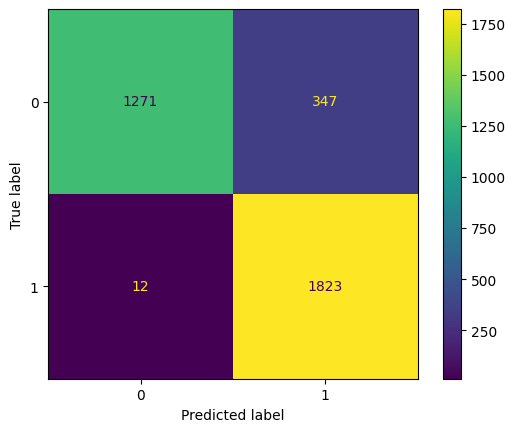

In [11]:
predictions = dt.predict(test_set.values)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### ROC-Curve

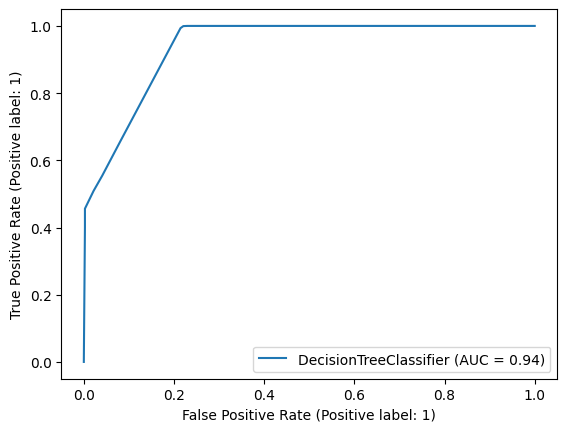

In [16]:
svc_disp = RocCurveDisplay.from_estimator(dt, test_set.values, test_label)
plt.show()

### PCA blobs

In [17]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

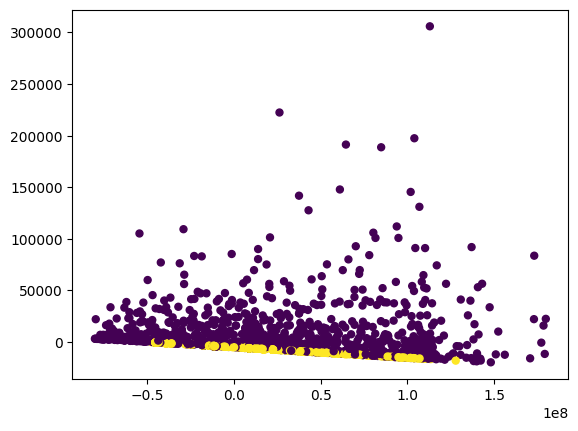

In [18]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

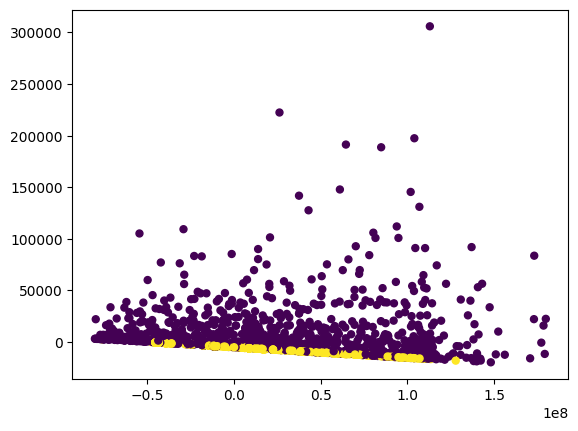

In [19]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

### Save model

In [21]:
with open("models_checkpoints/decision_tree_lang.bin", "wb") as f:
    pickle.dump(dt, f)

### Removed "lang" attribute for classification

Since we are not sure in the usage of Lang feature, we will try to remove that feature to see the difference in the accuracy, we have tryed to remove other features, but in those cases the model drop something in accuracy, we will see that for Lang this is not true.

In [22]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)
data.drop(columns=['lang'])
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['created_at', 'statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std']


In [23]:
param_grid = {
              'ccp_alpha': [0.0, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.5, 0.2],
              'min_weight_fraction_leaf': [0.0, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.5, 0.2],
              'min_samples_split': [2, 3, 4],
              'min_samples_leaf': [1, 2, 3, 4],
              'criterion': ['gini', 'entropy']
             }


dt = tree.DecisionTreeClassifier()

grid = GridSearchCV(
    dt,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=1
)


grid.fit(train_set, train_label)
print(
    "The best parameters are %s with a score of %0.5f"
    % (grid.best_params_, grid.best_score_)
)


Fitting 3 folds for each of 2400 candidates, totalling 7200 fits
The best parameters are {'ccp_alpha': 0.001, 'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0} with a score of 0.89832


In [24]:
dt = grid.best_estimator_
dt

DecisionTreeClassifier(ccp_alpha=0.001)

## Print Metrics

In [25]:
train_pred = dt.predict(train_set)
test_pred = dt.predict(test_set)

In [26]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9013035381750466
Accuracy test set  0.8960324355632783
Precision train set  0.9161702590948504
Recall train set  0.9013035381750466
F1 score train set  0.899733226153419
Support train set  (array([0.99766121, 0.8443303 ]), array([0.79120297, 0.99836487]), array([0.8825181 , 0.91490956]), array([3774, 4281]))


In [27]:
report_scores(test_label,test_pred)

              precision    recall  f1-score   support

        <=50       0.99      0.79      0.88      1618
         >50       0.84      0.99      0.91      1835

    accuracy                           0.90      3453
   macro avg       0.92      0.89      0.89      3453
weighted avg       0.91      0.90      0.89      3453



### Confusion Matrix

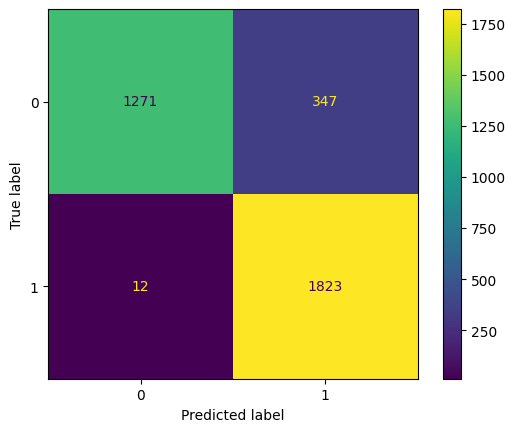

In [28]:
predictions = dt.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

### ROC-Curve

/Users/lucamoroni/Desktop/__WorkSpace/__Universita/unipi/DataMining/Data_Mining_22_23/venv/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


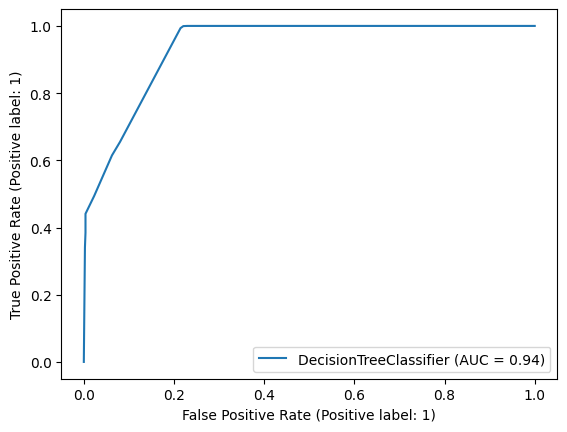

In [29]:
svc_disp = RocCurveDisplay.from_estimator(dt, test_set.values, test_label)
plt.show()

In [30]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

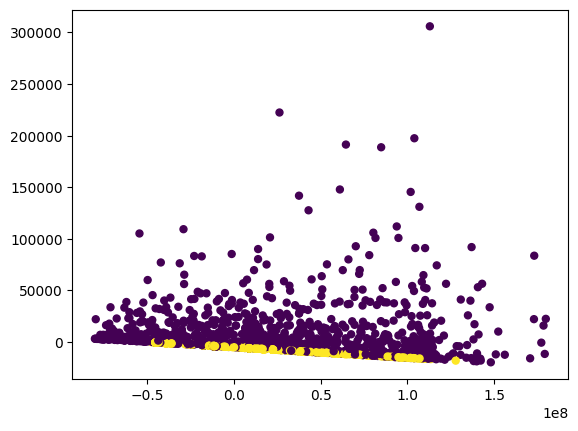

In [31]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

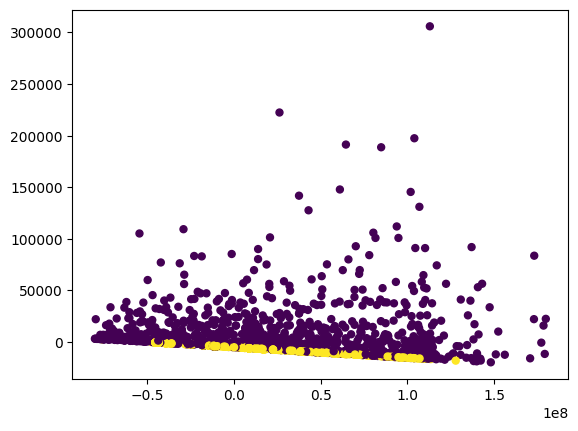

In [32]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

### Save model

In [33]:
with open("models_checkpoints/decision_tree_no_lang.bin", "wb") as f:
    pickle.dump(dt, f)

## Random forest

Run grid search - cross validation over the RandomForestClassifier sklearn implementation, the parameters over which the grid search will run are:
- ccp_alpha: Complexity parameter used for Minimal Cost-Complexity Pruning.
- min_weight_fraction_leaf: The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node.
- min_sample_split: The minimum number of samples required to split an internal node.
- min_sample_leaf: The minimum number of samples required to be at a leaf node.
- n_estimators: The function to measure the quality of a split.

In [ ]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)
data = data.join(pd.get_dummies(data["lang"]))
train_set, test_set, train_label, test_label = prepare_data(data)

In [ ]:
param_grid = {
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'ccp_alpha': [0.0, 0.1, 0.05, 0.001],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.05, 0.001],
    'n_estimators': np.arange(80, 150, 10),
}

rf = RandomForestClassifier()

grid = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=1
)

grid.fit(train_set, train_label)

In [5]:
rf = grid.best_estimator_
rf

RandomForestClassifier(min_samples_leaf=3, min_samples_split=3, n_estimators=90)

In [6]:
train_pred = rf.predict(train_set)
test_pred = rf.predict(test_set)

In [7]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.9710738671632526
Accuracy test set  0.9009556907037359
Precision train set  0.9725403427176358
Recall train set  0.9710738671632526
F1 score train set  0.9709972213229766
Support train set  (array([0.99971775, 0.94858156]), array([0.93852676, 0.99976641]), array([0.96815635, 0.97350165]), array([3774, 4281]))


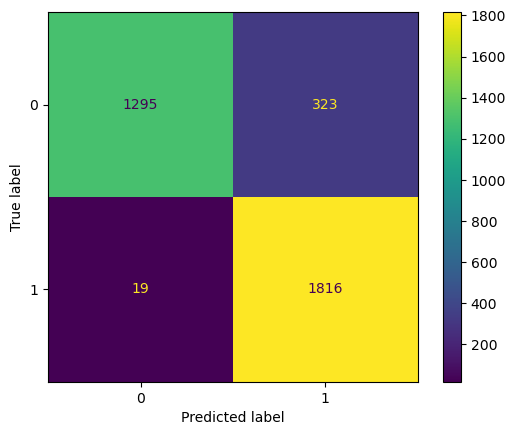

In [8]:
predictions = rf.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [9]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

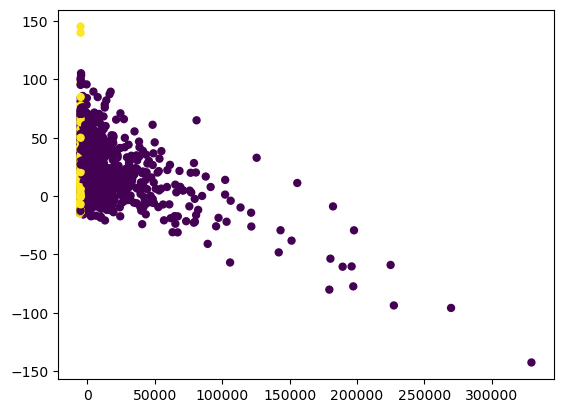

In [10]:
#true labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

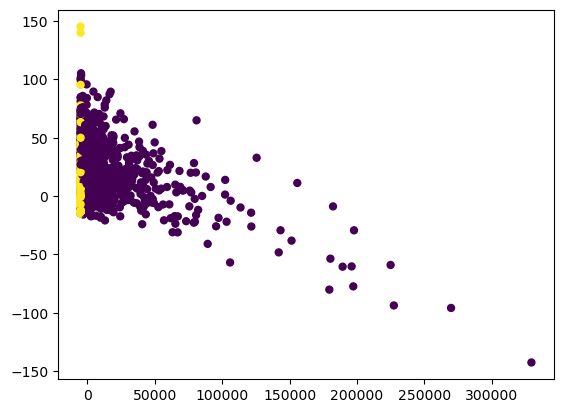

In [11]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

### Save model

In [50]:
with open("models_checkpoints/random_forest_lang.bin", "wb") as f:
    pickle.dump(rf, f)

FileNotFoundError: [Errno 2] No such file or directory: 'models_checkpoints/decision_tree_lang.bin'

### Removed "lang" attribute for classification

In [22]:
data = pd.read_csv("dataset/cleaned_user_profiles.csv", index_col=0)
train_set, test_set, train_label, test_label = prepare_data(data)

Classification features : ['statuses_count', 'avg_length', 'avg_special_chars', 'urls_ratio', 'mentions_ratio', 'hashtags_ratio', 'reply_count_mean', 'reply_count_std', 'favorite_count_mean', 'favorite_count_std', 'favorite_count_entropy', 'retweet_count_mean', 'retweet_count_std']


In [23]:
param_grid = {
    'min_samples_leaf': [1, 2, 3],
    'min_samples_split': [2, 3, 4],
    'ccp_alpha': [0.0, 0.1, 0.05, 0.001],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.05, 0.001],
    'n_estimators': np.arange(80, 150, 10),
}

rf = RandomForestClassifier()

grid = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring='accuracy',
    return_train_score=False,
    verbose=4
)

grid.fit(train_set, train_label)

Fitting 3 folds for each of 1008 candidates, totalling 3024 fits
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.893 total time=   0.6s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.893 total time=   0.5s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.886 total time=   0.5s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.892 total time=   0.6s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.893 total time=   0.6s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.887 total time=   0.6s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=1,

[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.857 total time=   0.4s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.849 total time=   0.4s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.848 total time=   0.4s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.855 total time=   0.4s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.849 total time=   0.4s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=140;, score=0.854 total time=   0.5s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, 

[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.835 total time=   0.3s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.849 total time=   0.3s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.855 total time=   0.3s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.841 total time=   0.3s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.851 total time=   0.3s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.846 total time=   0.3s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estima

[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.898 total time=   0.9s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.896 total time=   0.9s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.891 total time=   0.8s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.894 total time=   0.5s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.894 total time=   0.5s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.891 total time=   0.5s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_es

[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=110;, score=0.855 total time=   0.4s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=110;, score=0.850 total time=   0.4s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.853 total time=   0.4s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.857 total time=   0.4s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.850 total time=   0.4s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.852 total time=   0.4s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.05, 

[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=80;, score=0.836 total time=   0.2s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.847 total time=   0.3s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.856 total time=   0.3s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.846 total time=   0.2s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.852 total time=   0.3s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.854 total time=   0.3s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimator

[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.899 total time=   0.8s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.897 total time=   0.8s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.891 total time=   0.8s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.898 total time=   0.9s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.895 total time=   0.9s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.892 total time=   0.8s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=

[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=100;, score=0.857 total time=   0.3s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=100;, score=0.851 total time=   0.3s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=110;, score=0.852 total time=   0.4s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=110;, score=0.862 total time=   0.4s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=110;, score=0.845 total time=   0.4s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.856 total time=   0.4s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.05, 

[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=140;, score=0.889 total time=   0.9s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=80;, score=0.853 total time=   0.2s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=80;, score=0.846 total time=   0.2s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=80;, score=0.847 total time=   0.2s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.847 total time=   0.3s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.844 total time=   0.2s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators

[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=120;, score=0.897 total time=   0.7s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=120;, score=0.896 total time=   0.7s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=120;, score=0.891 total time=   0.7s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.898 total time=   0.8s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.895 total time=   0.8s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.889 total time=   0.8s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=

[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=90;, score=0.856 total time=   0.3s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=90;, score=0.850 total time=   0.3s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=100;, score=0.851 total time=   0.3s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=100;, score=0.864 total time=   0.3s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=100;, score=0.850 total time=   0.3s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=110;, score=0.852 total time=   0.4s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.05, n_

[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=130;, score=0.889 total time=   0.8s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=140;, score=0.896 total time=   0.9s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=140;, score=0.896 total time=   0.9s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=140;, score=0.888 total time=   0.8s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=80;, score=0.844 total time=   0.2s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=80;, score=0.842 total time=   0.2s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimat

[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=110;, score=0.899 total time=   0.7s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=110;, score=0.896 total time=   0.7s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=110;, score=0.891 total time=   0.7s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=120;, score=0.898 total time=   0.7s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=120;, score=0.895 total time=   0.8s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=120;, score=0.891 total time=   0.7s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=

[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=80;, score=0.855 total time=   0.3s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=80;, score=0.849 total time=   0.3s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=90;, score=0.853 total time=   0.3s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=90;, score=0.857 total time=   0.3s
[CV 3/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=90;, score=0.847 total time=   0.3s
[CV 1/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=100;, score=0.855 total time=   0.3s
[CV 2/3] END ccp_alpha=0.0, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_est

[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=120;, score=0.834 total time=   0.8s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=130;, score=0.850 total time=   0.9s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=130;, score=0.855 total time=   0.9s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=130;, score=0.848 total time=   0.8s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=140;, score=0.850 total time=   0.9s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=140;, score=0.855 total time=   0.9s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estim

[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=100;, score=0.854 total time=   0.6s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=100;, score=0.854 total time=   0.6s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=100;, score=0.848 total time=   0.6s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=110;, score=0.850 total time=   0.7s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=110;, score=0.855 total time=   0.7s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=110;, score=0.848 total time=   0.7s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=

[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=140;, score=0.839 total time=   0.4s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=140;, score=0.848 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=80;, score=0.854 total time=   0.3s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=80;, score=0.855 total time=   0.3s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=80;, score=0.841 total time=   0.3s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=90;, score=0.850 total time=   0.3s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.05, n_esti

[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=110;, score=0.848 total time=   0.7s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=120;, score=0.850 total time=   0.8s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=120;, score=0.855 total time=   0.8s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=120;, score=0.848 total time=   0.8s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=130;, score=0.850 total time=   0.9s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=130;, score=0.840 total time=   0.9s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estim

[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=90;, score=0.850 total time=   0.6s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=90;, score=0.855 total time=   0.6s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=90;, score=0.838 total time=   0.5s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=100;, score=0.850 total time=   0.6s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=100;, score=0.854 total time=   0.6s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=100;, score=0.848 total time=   0.6s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.0

[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=130;, score=0.854 total time=   0.4s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=130;, score=0.848 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=140;, score=0.850 total time=   0.4s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=140;, score=0.854 total time=   0.4s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=140;, score=0.848 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=80;, score=0.841 total time=   0.3s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.05, n_esti

[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=100;, score=0.848 total time=   0.6s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=110;, score=0.850 total time=   0.7s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=110;, score=0.842 total time=   0.7s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=110;, score=0.848 total time=   0.7s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=120;, score=0.850 total time=   0.8s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=120;, score=0.854 total time=   0.8s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estim

[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=80;, score=0.850 total time=   0.5s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=80;, score=0.855 total time=   0.5s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=80;, score=0.848 total time=   0.5s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=90;, score=0.853 total time=   0.6s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=90;, score=0.854 total time=   0.6s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=90;, score=0.842 total time=   0.5s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001,

[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=120;, score=0.854 total time=   0.3s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=120;, score=0.848 total time=   0.3s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=130;, score=0.850 total time=   0.3s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=130;, score=0.855 total time=   0.4s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=130;, score=0.834 total time=   0.3s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=140;, score=0.850 total time=   0.4s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estim

[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.848 total time=   0.5s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100;, score=0.850 total time=   0.6s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100;, score=0.855 total time=   0.6s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100;, score=0.848 total time=   0.6s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=110;, score=0.850 total time=   0.7s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=110;, score=0.855 total time=   0.7s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estima

[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=140;, score=0.850 total time=   0.5s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=140;, score=0.855 total time=   0.5s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=140;, score=0.848 total time=   0.5s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=80;, score=0.799 total time=   0.5s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=80;, score=0.854 total time=   0.5s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=80;, score=0.836 total time=   0.5s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.001,

[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.854 total time=   0.3s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.848 total time=   0.3s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=120;, score=0.850 total time=   0.3s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=120;, score=0.854 total time=   0.3s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=120;, score=0.848 total time=   0.3s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=130;, score=0.850 total time=   0.3s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estim

[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.848 total time=   0.5s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.850 total time=   0.6s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.855 total time=   0.6s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.836 total time=   0.5s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100;, score=0.850 total time=   0.6s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100;, score=0.854 total time=   0.6s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimator

[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.850 total time=   0.4s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.855 total time=   0.4s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.848 total time=   0.4s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=140;, score=0.850 total time=   0.5s
[CV 2/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=140;, score=0.855 total time=   0.5s
[CV 3/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=140;, score=0.848 total time=   0.5s
[CV 1/3] END ccp_alpha=0.1, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.001,

[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.841 total time=   0.3s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.833 total time=   0.3s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.839 total time=   0.3s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.840 total time=   0.3s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.834 total time=   0.3s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=120;, score=0.838 total time=   0.3s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, 

[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.835 total time=   0.8s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.850 total time=   0.5s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.841 total time=   0.5s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.836 total time=   0.5s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.844 total time=   0.6s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.840 total time=   0.6s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_e

[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.839 total time=   0.4s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.842 total time=   0.4s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.834 total time=   0.4s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.839 total time=   0.4s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.854 total time=   0.4s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.836 total time=   0.4s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf

[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.841 total time=   0.2s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.834 total time=   0.2s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.839 total time=   0.3s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.839 total time=   0.3s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.836 total time=   0.3s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.841 total time=   0.3s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.1, n_

[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.833 total time=   0.8s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.848 total time=   0.9s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.839 total time=   0.9s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.844 total time=   0.8s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.841 total time=   0.5s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.853 total time=   0.5s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf

[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=110;, score=0.844 total time=   0.4s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=110;, score=0.841 total time=   0.4s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=110;, score=0.835 total time=   0.4s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.839 total time=   0.4s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.846 total time=   0.4s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.838 total time=   0.4s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf

[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=80;, score=0.845 total time=   0.2s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=80;, score=0.841 total time=   0.2s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.801 total time=   0.3s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.841 total time=   0.2s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.832 total time=   0.2s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.841 total time=   0.3s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_est

[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=120;, score=0.836 total time=   0.7s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.838 total time=   0.8s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.841 total time=   0.8s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.835 total time=   0.8s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.838 total time=   0.9s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.841 total time=   0.9s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=3, min_weight_fractio

[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=100;, score=0.839 total time=   0.3s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=100;, score=0.845 total time=   0.3s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=100;, score=0.835 total time=   0.3s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=110;, score=0.838 total time=   0.4s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=110;, score=0.842 total time=   0.4s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=110;, score=0.834 total time=   0.4s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf

[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=140;, score=0.842 total time=   0.9s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=140;, score=0.835 total time=   0.9s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=80;, score=0.842 total time=   0.2s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=80;, score=0.839 total time=   0.2s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=80;, score=0.835 total time=   0.2s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.840 total time=   0.3s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.1, n_es

[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=110;, score=0.839 total time=   0.7s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=120;, score=0.839 total time=   0.8s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=120;, score=0.841 total time=   0.8s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=120;, score=0.836 total time=   0.7s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.846 total time=   0.8s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.849 total time=   0.9s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=2, min_weight_fractio

[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=90;, score=0.839 total time=   0.3s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=90;, score=0.847 total time=   0.3s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=90;, score=0.834 total time=   0.3s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=100;, score=0.843 total time=   0.4s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=100;, score=0.842 total time=   0.4s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=100;, score=0.836 total time=   0.4s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.

[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=130;, score=0.841 total time=   0.8s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=130;, score=0.835 total time=   0.8s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=140;, score=0.844 total time=   0.9s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=140;, score=0.842 total time=   0.9s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=140;, score=0.835 total time=   0.8s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=80;, score=0.841 total time=   0.2s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.1, n

[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=100;, score=0.833 total time=   0.6s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=110;, score=0.843 total time=   0.7s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=110;, score=0.840 total time=   0.7s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=110;, score=0.837 total time=   0.6s
[CV 1/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=120;, score=0.850 total time=   0.7s
[CV 2/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=120;, score=0.843 total time=   0.7s
[CV 3/3] END ccp_alpha=0.05, min_samples_leaf=3, min_samples_split=4, min_weight_fractio

[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=80;, score=0.850 total time=   0.3s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=80;, score=0.857 total time=   0.3s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=80;, score=0.845 total time=   0.3s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=90;, score=0.851 total time=   0.3s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=90;, score=0.855 total time=   0.3s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.05, n_estimators=90;, score=0.847 total time=   0.3s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_lea

[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=120;, score=0.898 total time=   0.8s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=120;, score=0.896 total time=   0.8s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=120;, score=0.893 total time=   0.8s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=130;, score=0.899 total time=   0.9s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=130;, score=0.895 total time=   0.9s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=130;, score=0.893 total time=   0.8s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_lea

[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=90;, score=0.895 total time=   0.6s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=90;, score=0.892 total time=   0.6s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=100;, score=0.899 total time=   0.7s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=100;, score=0.895 total time=   0.7s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=100;, score=0.892 total time=   0.6s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fraction_leaf=0.001, n_estimators=110;, score=0.898 total time=   0.7s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=3, min_weight_fr

[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=130;, score=0.844 total time=   0.4s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=140;, score=0.848 total time=   0.4s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=140;, score=0.850 total time=   0.4s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=140;, score=0.840 total time=   0.4s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=80;, score=0.855 total time=   0.3s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=80;, score=0.858 total time=   0.3s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=1, min_samples_split=4, min_weight_fraction_lea

[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100;, score=0.891 total time=   0.6s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=110;, score=0.899 total time=   0.7s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=110;, score=0.895 total time=   0.7s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=110;, score=0.893 total time=   0.7s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=120;, score=0.900 total time=   0.8s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=120;, score=0.895 total time=   0.8s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_lea

[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=80;, score=0.899 total time=   0.5s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=80;, score=0.896 total time=   0.5s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=80;, score=0.892 total time=   0.5s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=90;, score=0.899 total time=   0.6s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=90;, score=0.894 total time=   0.6s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fraction_leaf=0.001, n_estimators=90;, score=0.892 total time=   0.5s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=2, min_weight_fracti

[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=120;, score=0.851 total time=   0.3s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=120;, score=0.836 total time=   0.3s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=130;, score=0.848 total time=   0.4s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=130;, score=0.843 total time=   0.4s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=130;, score=0.838 total time=   0.4s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_leaf=0.1, n_estimators=140;, score=0.851 total time=   0.4s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=3, min_weight_fraction_lea

[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.895 total time=   0.6s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.892 total time=   0.6s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100;, score=0.899 total time=   0.7s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100;, score=0.895 total time=   0.7s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=100;, score=0.893 total time=   0.6s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.0, n_estimators=110;, score=0.899 total time=   0.7s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=

[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.850 total time=   0.4s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=140;, score=0.849 total time=   0.5s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=140;, score=0.855 total time=   0.5s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.05, n_estimators=140;, score=0.845 total time=   0.5s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=80;, score=0.898 total time=   0.5s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=80;, score=0.896 total time=   0.5s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=4, min_weight_fracti

[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.853 total time=   0.3s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.845 total time=   0.3s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.842 total time=   0.3s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=120;, score=0.848 total time=   0.4s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=120;, score=0.842 total time=   0.4s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=120;, score=0.834 total time=   0.3s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=2, min_weight_fraction_lea

[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.899 total time=   0.5s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.894 total time=   0.5s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=80;, score=0.892 total time=   0.5s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.899 total time=   0.6s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.894 total time=   0.6s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.0, n_estimators=90;, score=0.892 total time=   0.5s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.0,

[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.856 total time=   0.4s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=120;, score=0.849 total time=   0.4s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.851 total time=   0.4s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.857 total time=   0.4s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=130;, score=0.843 total time=   0.4s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fraction_leaf=0.05, n_estimators=140;, score=0.848 total time=   0.5s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=3, min_weight_fracti

[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=90;, score=0.838 total time=   0.2s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.852 total time=   0.3s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.854 total time=   0.3s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=100;, score=0.847 total time=   0.3s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.851 total time=   0.3s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.1, n_estimators=110;, score=0.844 total time=   0.3s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf

[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=130;, score=0.892 total time=   0.8s
[CV 1/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.898 total time=   0.9s
[CV 2/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.894 total time=   0.9s
[CV 3/3] END ccp_alpha=0.001, min_samples_leaf=3, min_samples_split=4, min_weight_fraction_leaf=0.001, n_estimators=140;, score=0.893 total time=   0.9s


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.05, 0.001],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.05, 0.001],
                         'n_estimators': array([ 80,  90, 100, 110, 120, 130, 140])},
             scoring='accuracy', verbose=4)

In [24]:
rf = grid.best_estimator_
rf

RandomForestClassifier(ccp_alpha=0.001, min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [25]:
train_pred = rf.predict(train_set)
test_pred = rf.predict(test_set)

In [26]:
print_metrics(train_label, train_pred, test_label, test_pred)

Accuracy train set  0.8985723153320919
Accuracy test set  0.8960324355632783
Precision train set  0.9142203238328424
Recall train set  0.8985723153320919
F1 score train set  0.8968832221186307
Support train set  (array([0.99764389, 0.84067663]), array([0.78537361, 0.99836487]), array([0.87887324, 0.91276028]), array([3774, 4281]))


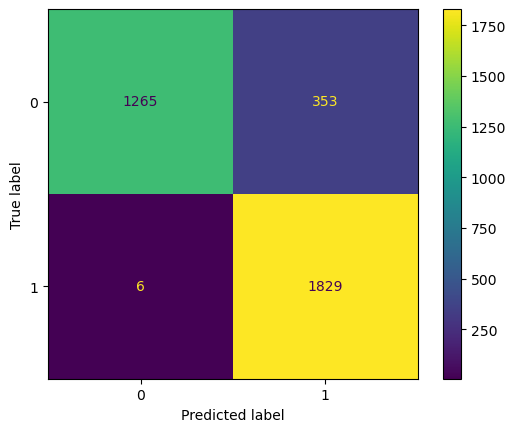

In [27]:
predictions = rf.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [28]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

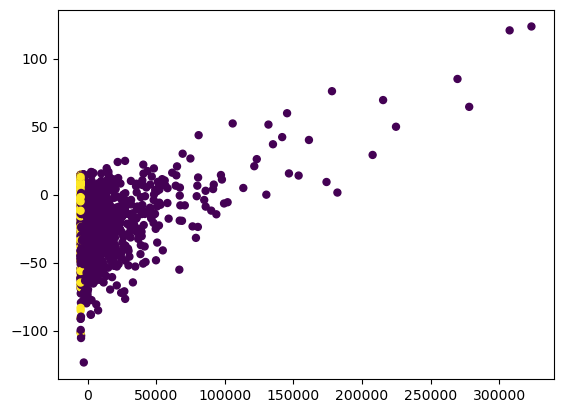

In [29]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

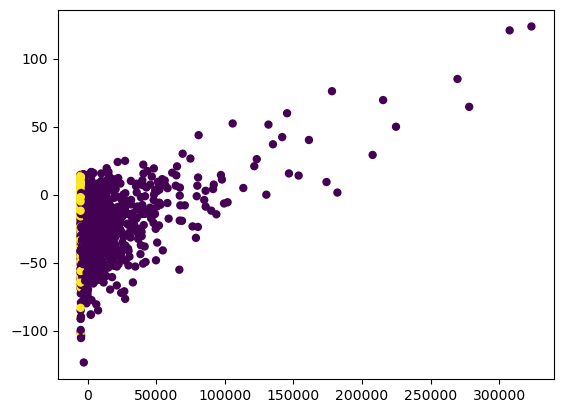

In [30]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

### Save model

In [50]:
with open("models_checkpoints/random_forest_no_lang.bin", "wb") as f:
    pickle.dump(rf, f)

FileNotFoundError: [Errno 2] No such file or directory: 'models_checkpoints/decision_tree_lang.bin'

### Random Hyperparameter Grid Search (FORSE RIMUOVERE!!!)

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestClassifier()

rf_random = RandomizedSearchCV(
    estimator = rf,
    param_distributions = random_grid,
    n_iter = 100,
    cv = 3,
    verbose=4,
    random_state=42,
    n_jobs = -1
)

rf_random.fit(train_set, train_label)
print(
    "The best parameters are %s with a score of %0.5f"
    % (rf_random.best_params_, rf_random.best_score_)
)



In [ ]:
rf = rf_random.best_estimator_

In [ ]:
train_pred = rf.predict(train_set)
test_pred = rf.predict(test_set)

In [ ]:
# cross validation
scores = cross_validate(rf, train_set, train_label, cv=3, return_train_score= True)
print('Fit time ', statistics.mean(scores['fit_time']))
print('Score time ', statistics.mean(scores['score_time']))
print('Test score ', statistics.mean(scores['test_score']))
print('Train score ', statistics.mean(scores['train_score']))

In [ ]:
predictions = rf.predict(test_set)

cm = confusion_matrix(test_label, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.show()

In [ ]:
pca = PCA(n_components=2)
test_set_reduced = pca.fit_transform(test_set.values)

In [ ]:
#true labels
from sklearn.datasets import make_blobs
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_label, s=25);

In [ ]:
#predicted labels
plt.scatter(test_set_reduced[:, 0], test_set_reduced[:, 1], c=test_pred, s=25);

### Save Model

In [ ]:
with open("models_checkpoints/random_forest_2_no_lang.bin", "wb") as f:
    pickle.dump(dt, f)